# Importing All Libraries Needed

In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve
import warnings
warnings.filterwarnings("ignore")

# IMPORT THE DATASET

In [4]:
df=pd.read_csv(r'c:\Users\ADMIN\Documents\country_wise_latest.csv')
df1=pd.read_csv(r"C:\Users\ADMIN\Documents\world_population_data.csv")
df1

,rank,cca3,country,continent,2023 population,2022 population,2020 population,2015 population,2010 population,2000 population,1990 population,1980 population,1970 population,area (km²),density (km²),growth rate,world percentage
0,1,IND,India,Asia,1428627663,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590.00,481,0.81%,17.85%
1,2,CHN,China,Asia,1425671352,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961.00,151,-0.02%,17.81%
2,3,USA,United States,North America,339996563,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610.00,37,0.50%,4.25%
3,4,IDN,Indonesia,Asia,277534122,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569.00,148,0.74%,3.47%
4,5,PAK,Pakistan,Asia,240485658,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912.00,312,1.98%,3.00%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,MSR,Montserrat,North America,4386,4390,4500,5059,4938,5138,10805,11452,11402,102.00,43,-0.09%,0.00%
230,231,FLK,Falkland Islands,South America,3791,3780,3747,3408,3187,3080,2332,2240,2274,12173.00,0,0.29%,0.00%
231,232,NIU,Niue,Oceania,1935,1934,1942,1847,1812,2074,2533,3637,5185,261.00,7,0.05%,0.00%
232,233,TKL,Tokelau,Oceania,1893,1871,1827,1454,1367,1666,1669,1647,1714,12.00,189,1.18%,0.00%


# Feature Engineering

In [9]:
unique = df['Country/Region'].unique()
unique.sort()

unique1 = df1['country'].unique()
unique1.sort()

In [10]:
df.rename(columns={'Country/Region': 'country'}, inplace=True)
df['country'] = df['country'].replace('US', 'United States')
df['country'] = df['country'].replace('Holy See', 'Vatican City')

df2 = df1[['country','2020 population']]
data = pd.merge(df, df2, on='country', how='inner')

data['Daily Growth Rate (%)'] = data['Confirmed'].pct_change().fillna(0) * 100
data['Mortality Ratio (%)'] = (data['Deaths'] / data['Confirmed']).fillna(0) * 100
data['Cases per 100,000'] = (data['Confirmed'] / data['2020 population']) * 100000
data

,country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region,2020 population,Daily Growth Rate (%),Mortality Ratio (%),"Cases per 100,000"
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean,38972230,0.000000,3.499435,93.048306
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe,2866849,-86.542757,2.950820,170.221731
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa,43451666,473.217213,4.157581,64.377278
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe,77700,-96.757588,5.733186,1167.310167
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa,33428485,4.740904,4.315789,2.841888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,Vietnam,431,0,365,66,11,0,0,0.00,84.69,0.00,384,47,12.24,Western Pacific,96648685,-97.304228,0.000000,0.445945
174,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa,556048,-97.679814,10.000000,1.798406
175,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean,32284046,16810.000000,28.562980,5.237881
176,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa,18927715,169.189829,3.075571,24.049390


In [11]:
# Check for missing values and duplicates
missing_values = data.isnull().sum()
duplicates = data.duplicated().sum()

# Calculate summary statistics to identify potential univariate outliers
summary_stats = data.describe()
missing_values

country                   0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
2020 population           0
Daily Growth Rate (%)     0
Mortality Ratio (%)       0
Cases per 100,000         0
dtype: int64

In [12]:
X = data.drop(columns=['New cases','country','2020 population','Cases per 100,000','WHO Region','Deaths / 100 Cases','Recovered / 100 Cases','1 week % increase','Deaths / 100 Recovered','Daily Growth Rate (%)','Mortality Ratio (%)'])
y = data['New cases']

#X = data.drop(columns=['New cases','country','WHO Region'])
#y = data['New cases']

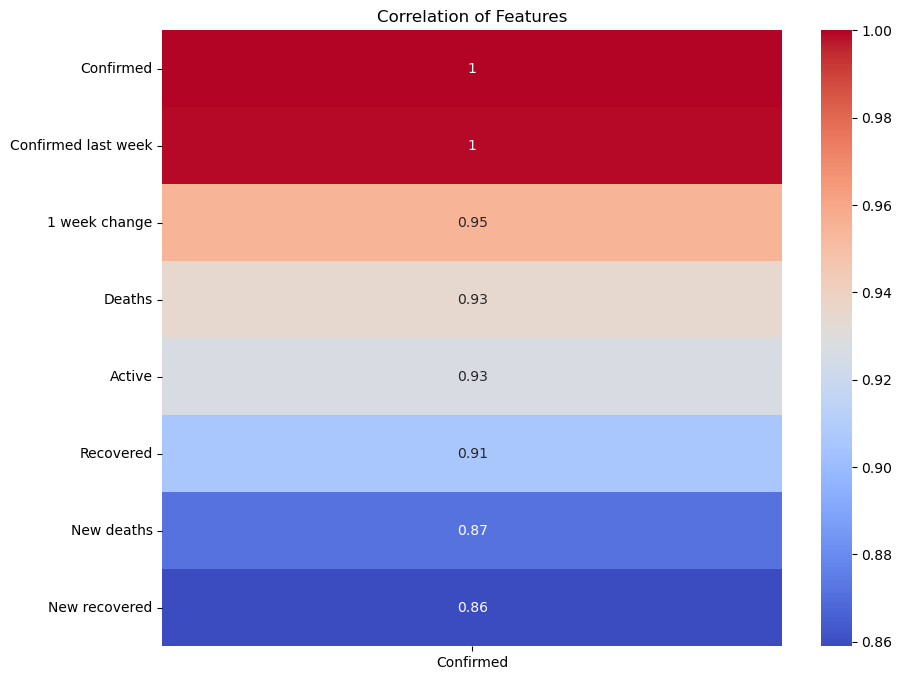

In [13]:
# One-hot encode categorical columns
#X_encoded = pd.get_dummies(X, drop_first=True)

# Calculate the correlation matrix
correlation_matrix = X.corr()

# Display the correlation of features with 'New cases'
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['Confirmed']].sort_values(by='Confirmed', ascending=False), 
            annot=True, cmap='coolwarm')
plt.title("Correlation of Features")
plt.savefig("Correlation of Features with New cases2.png", format="png", dpi=300, bbox_inches="tight")
plt.show()

Remaining NaNs after cleaning: 0


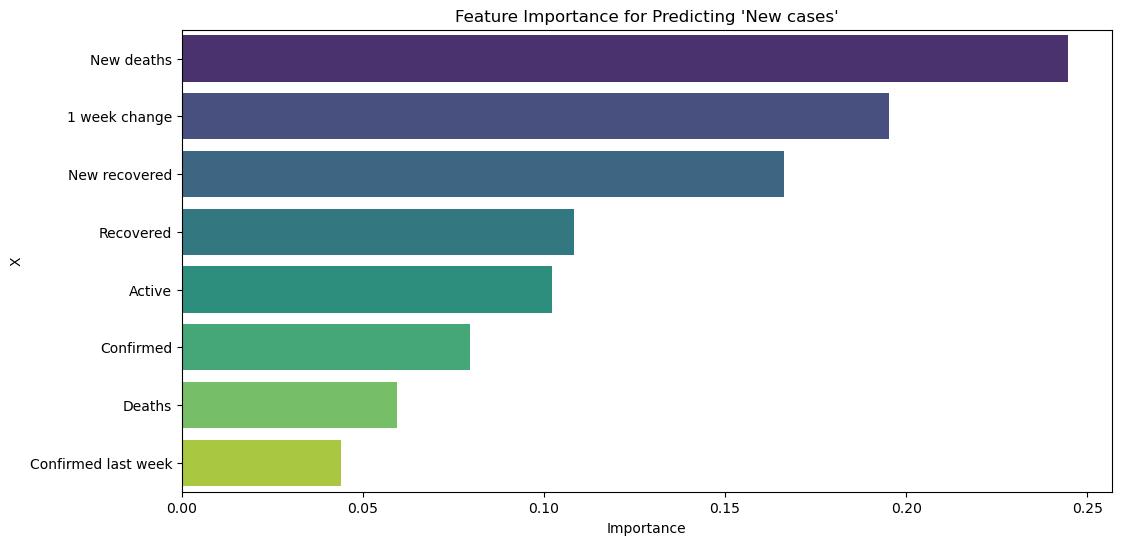

In [14]:

# Replace any infinite values with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Now, fill NaN values (resulting from inf replacements or original NaNs)
# You could fill with the mean, median, or zero, depending on the use case
X = X.fillna(X.mean())

# Check if any inf or NaN values remain
print("Remaining NaNs after cleaning:", X.isnull().sum().sum())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
# Feature importances
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({'X': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

importance_df
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='X', data=importance_df, palette='viridis')
plt.title("Feature Importance for Predicting 'New cases'")
plt.savefig("Feature Importance for Predicting New cases2.png", format="png", dpi=300, bbox_inches="tight")
plt.show()

# Checking for outliers in the data

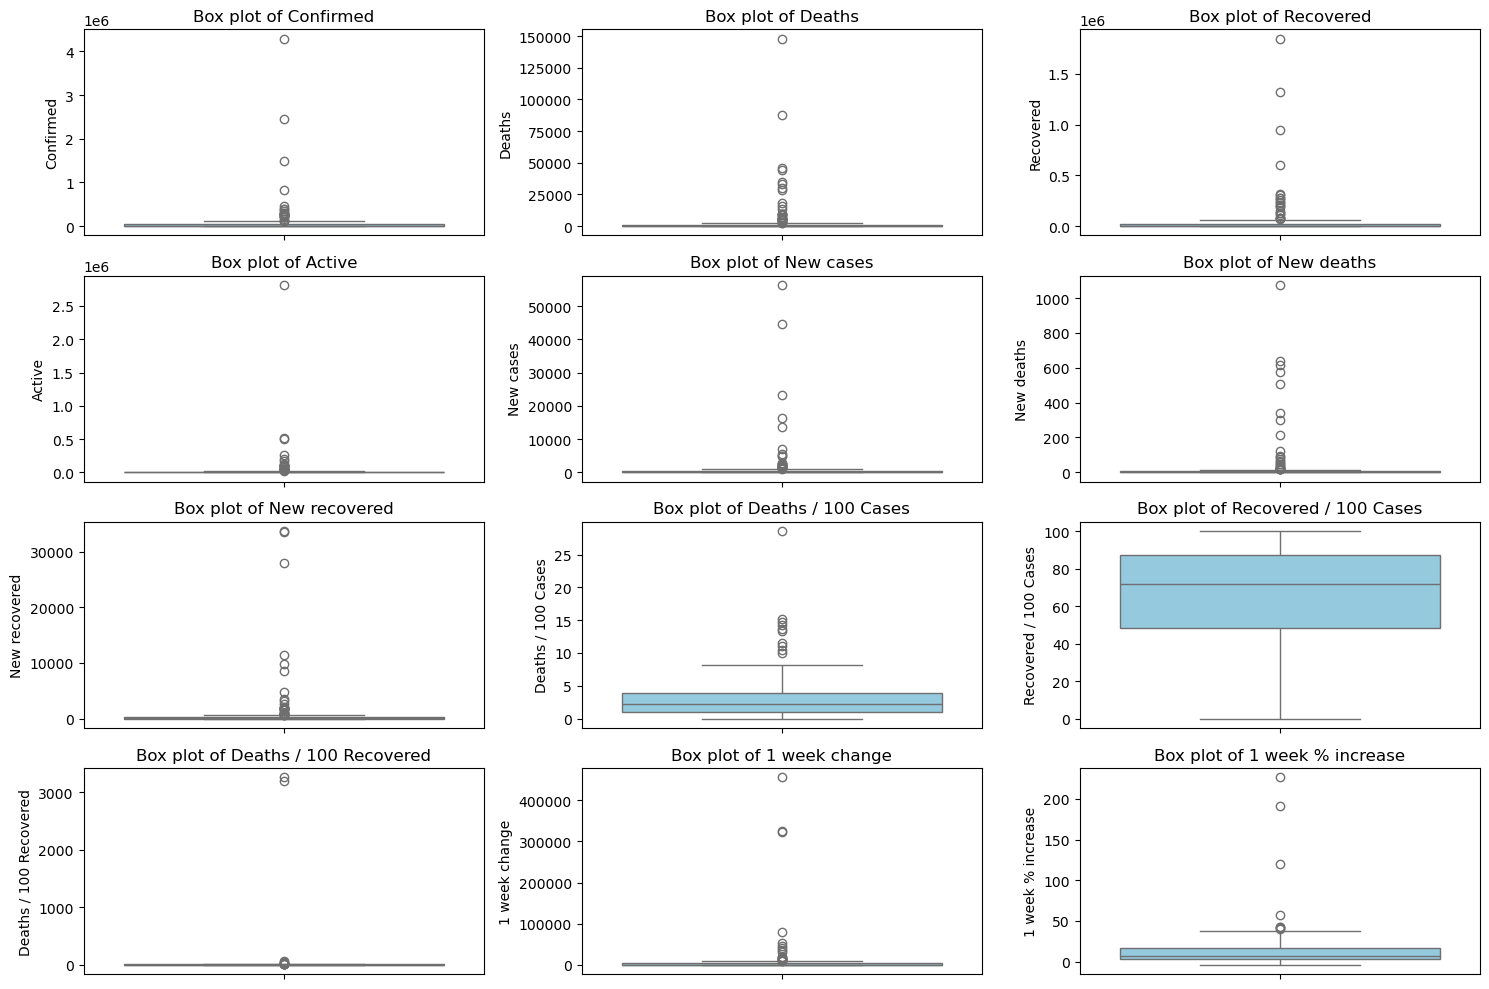

In [15]:
# Select columns with numerical data
numerical_columns = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered',
                     'Deaths / 100 Cases', 'Recovered / 100 Cases', 'Deaths / 100 Recovered', 
                     '1 week change', '1 week % increase']

# Create box plots
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data[column], color='skyblue')
    plt.title(f'Box plot of {column}')
plt.tight_layout()
plt.savefig("Outliers in the dataset.png", format="png", dpi=300, bbox_inches="tight")
plt.show()


# Exploratory Data Analysis

# DISTRIBUTION OF DAILY GROWTH RATE

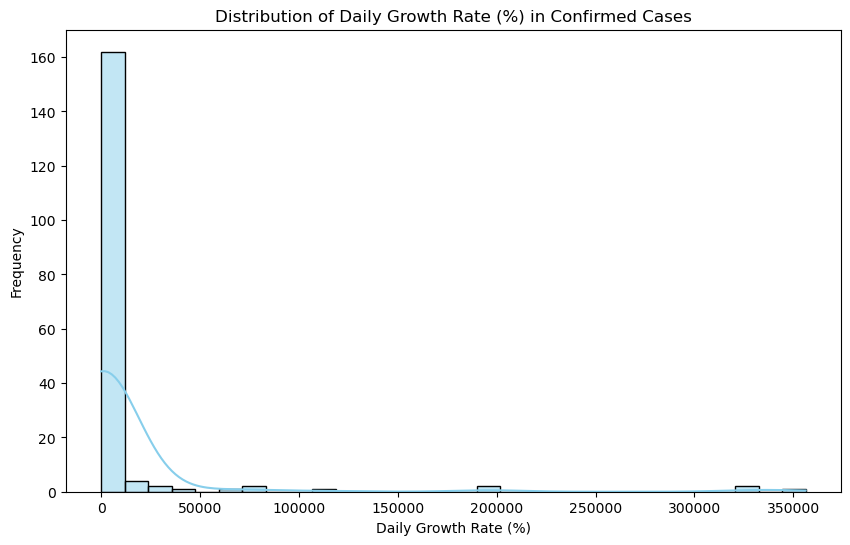

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Daily Growth Rate (%)'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Daily Growth Rate (%) in Confirmed Cases")
plt.xlabel("Daily Growth Rate (%)")
plt.ylabel("Frequency")
plt.savefig("Daily growth rate.png",format="png",dpi=300, bbox_inches="tight")
plt.show()

# Distribution of cases per 100,000 of the population 

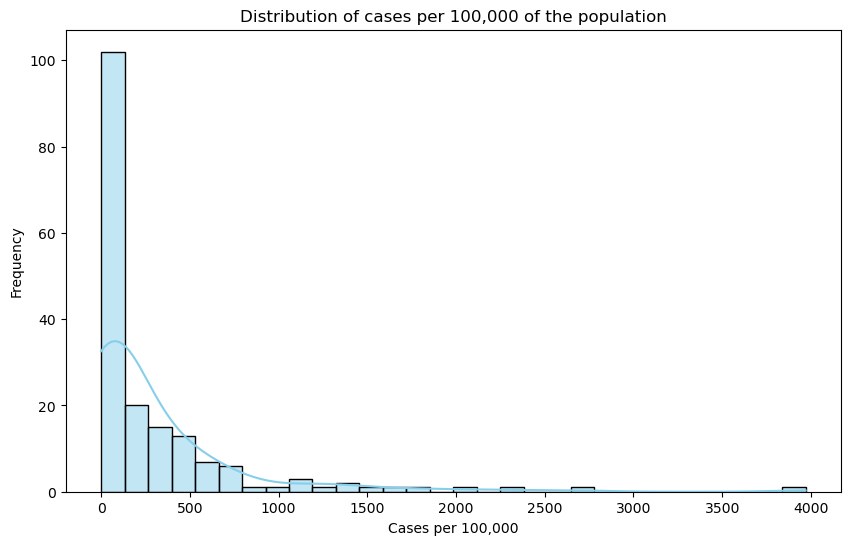

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Cases per 100,000'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of cases per 100,000 of the population")
plt.xlabel("Cases per 100,000")
plt.ylabel("Frequency")
plt.savefig("Cases per 100,000.png",format="png",dpi=300, bbox_inches="tight")
plt.show()

# Distribution Mortality Ratio

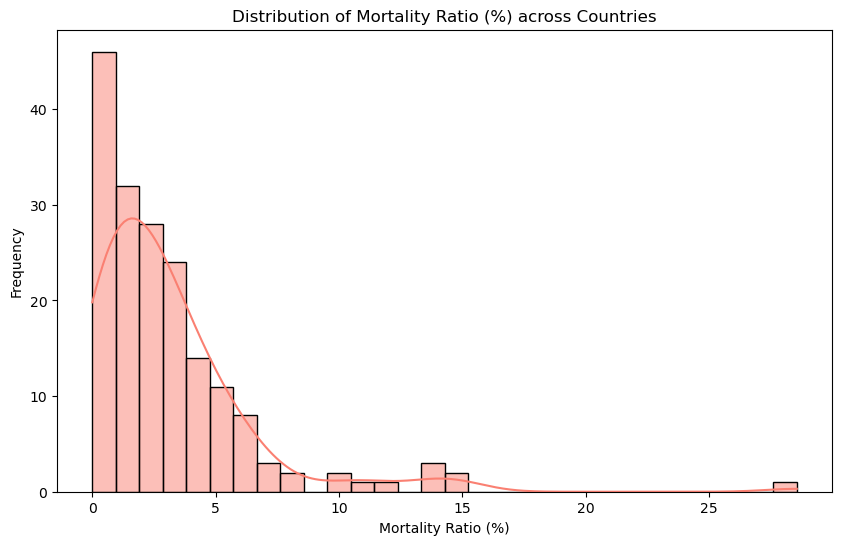

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Mortality Ratio (%)'], bins=30, kde=True, color='salmon')
plt.title("Distribution of Mortality Ratio (%) across Countries")
plt.xlabel("Mortality Ratio (%)")
plt.ylabel("Frequency")
plt.savefig("Distribution of mortality rate.png", format="png", dpi=300, bbox_inches="tight")
plt.show()

# Daily Growth Rate v Mortality Ratio

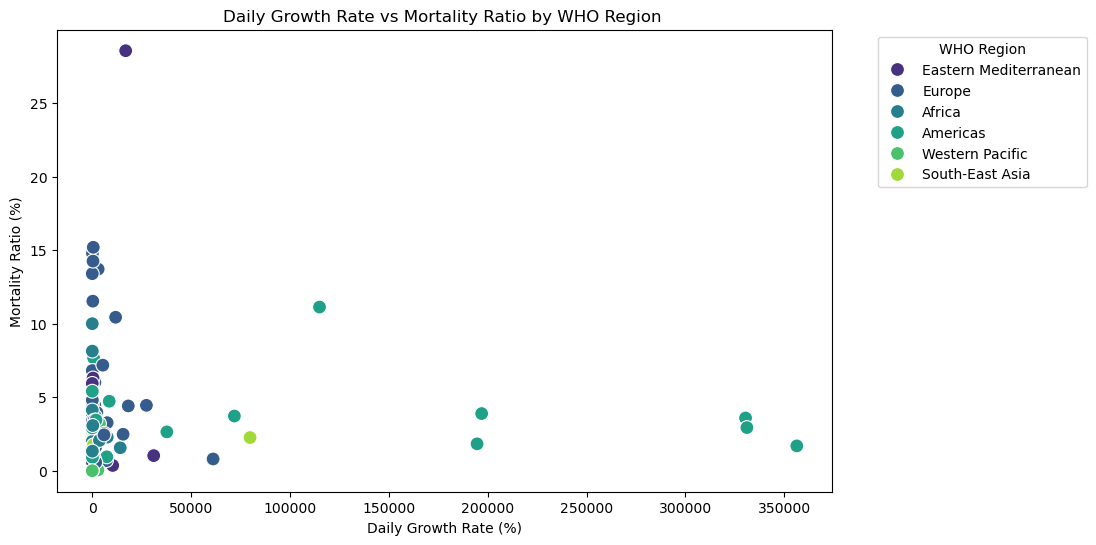

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Daily Growth Rate (%)', y='Mortality Ratio (%)', hue='WHO Region', palette='viridis', s=100)
plt.title("Daily Growth Rate vs Mortality Ratio by WHO Region ")
plt.xlabel("Daily Growth Rate (%)")
plt.ylabel("Mortality Ratio (%)")
plt.legend(title='WHO Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig("Daily Growth Rate vs. Mortality Ratio.png",format="png",dpi=300, bbox_inches="tight")
plt.show()

# TOP TEN COUNTRIES BY CONFIRMED COVID-19 CASES

In [7]:
top_10_cases = data.nlargest(10, 'Confirmed')
sns.barplot(data=top_10_cases, x='Confirmed', y='country', color='skylues')
plt.title('Top 10 Countries by Confirmed COVID-19 Cases')
plt.xlabel('Confirmed Cases')
plt.ylabel('Country')
plt.savefig("top country by confirmed cases.png", format="png", dpi=300, bbox_inches="tight")
plt.show()

NameError: name 'data' is not defined

# LATEST COUNTRIES BY CONFIRMED COVID-19 CASES

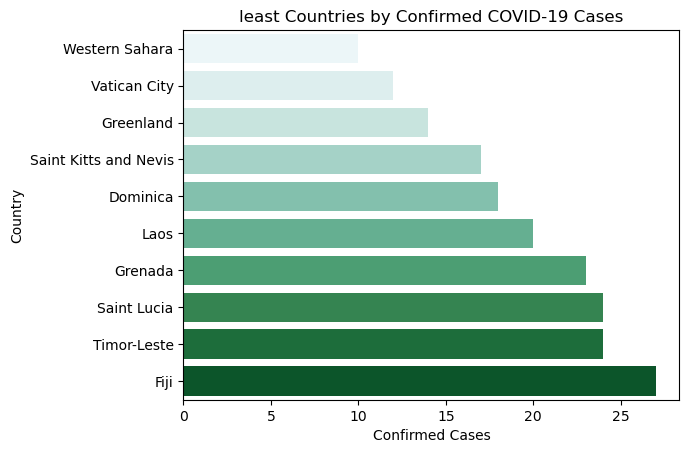

In [21]:
top_10_cases = data.nsmallest(10, 'Confirmed')
sns.barplot(data=top_10_cases, x='Confirmed', y='country', palette='BuGn')
plt.title('least Countries by Confirmed COVID-19 Cases')
plt.xlabel('Confirmed Cases')
plt.ylabel('Country')
plt.savefig("least country by confirmed cases.png", format="png", dpi=300, bbox_inches="tight")
plt.show()

# DEATH RATE VS RECOVERY RATE BY COUNTRY

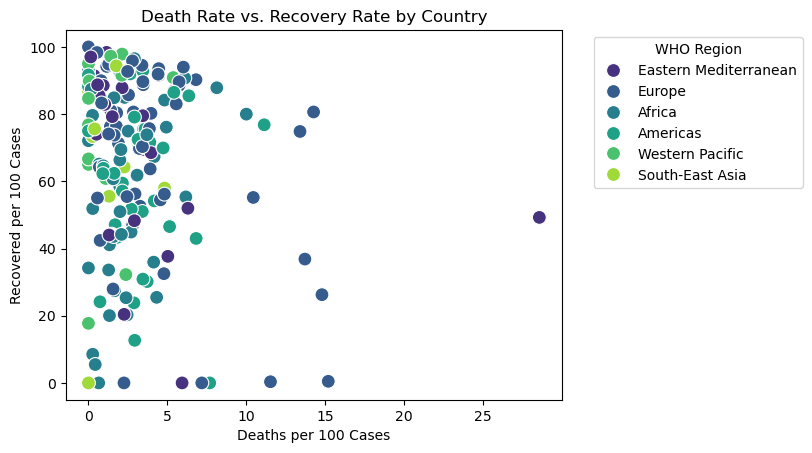

In [22]:
sns.scatterplot(data=data, x='Deaths / 100 Cases', y='Recovered / 100 Cases', hue='WHO Region', s=100, palette='viridis')
plt.title('Death Rate vs. Recovery Rate by Country')
plt.xlabel('Deaths per 100 Cases')
plt.ylabel('Recovered per 100 Cases')
plt.legend(title='WHO Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig("Death Rate vs. Recovery Rate by Country.png", format="png", dpi=300, bbox_inches="tight")
plt.show()

# CONFIRMED CASE RATE AND DEATH RATE BY WHO REGION

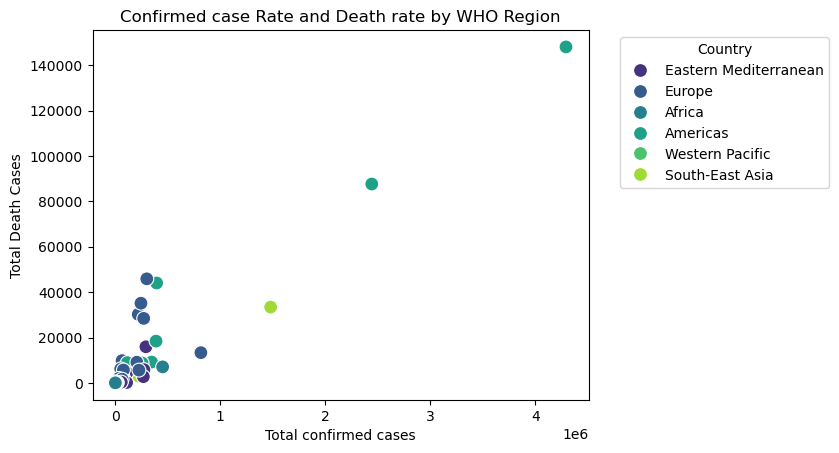

In [23]:
sns.scatterplot(data=data, x='Confirmed', y='Deaths', hue='WHO Region', s=100, palette='viridis')
plt.title('Confirmed case Rate and Death rate by WHO Region')
plt.xlabel('Total confirmed cases')
plt.ylabel('Total Death Cases')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig("Confirmed Case rate and death rate by WHO Region.png", format="png", dpi=300, bbox_inches="tight")
plt.show()

# NEW CASES,DEATHS AND RECOVERIES BY WHO REGION

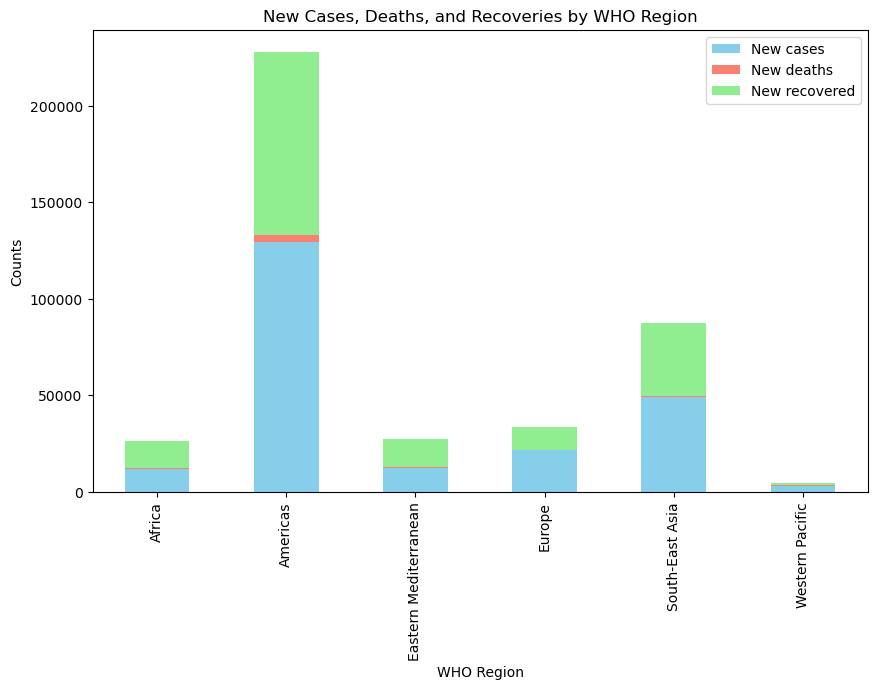

In [19]:
region_data = data.groupby('WHO Region')[['New cases', 'New deaths', 'New recovered']].sum()

region_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon', 'lightgreen'])
plt.title('New Cases, Deaths, and Recoveries by WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Counts')
plt.savefig("New Cases, Deaths, and Recoveries Comparison by Region.png", format="png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
#  MORTALITY RATE DISTRIBUTION BY WHO REGION

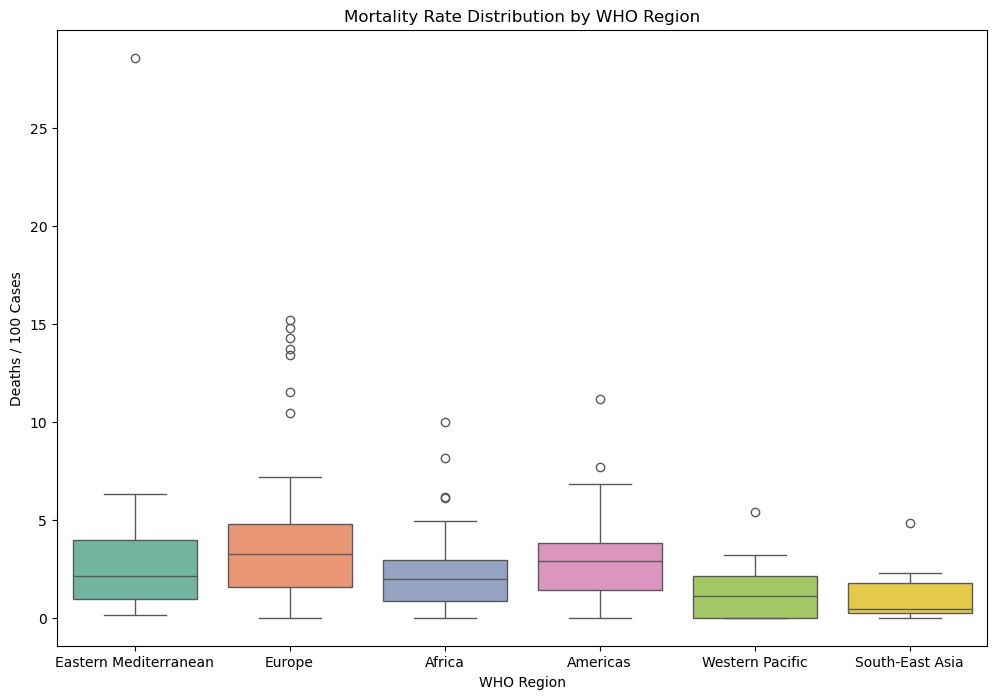

In [24]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='WHO Region', y='Deaths / 100 Cases', palette='Set2')
plt.title('Mortality Rate Distribution by WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Deaths / 100 Cases')
plt.savefig("Mortality Rate Distribution by Region by Region.png", format="png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
# BUILDING THE MODEL

In [ ]:
# WITH RANDOMFORESTREGRESSOR

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)
# Evaluate the model
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = mean_squared_error(y_test, pred, squared=False)
r2 = r2_score(y_test, pred)

pred,mae, mse, rmse, r2
print('mae', mae)
print('mse', mse)
print('rmse', rmse)
print('r2', r2)

mae 138.38944444444448
mse 92052.65392407408
rmse 303.4018027699804
r2 0.6630690773448287


# ACTUAL V PREDICTED VALUES

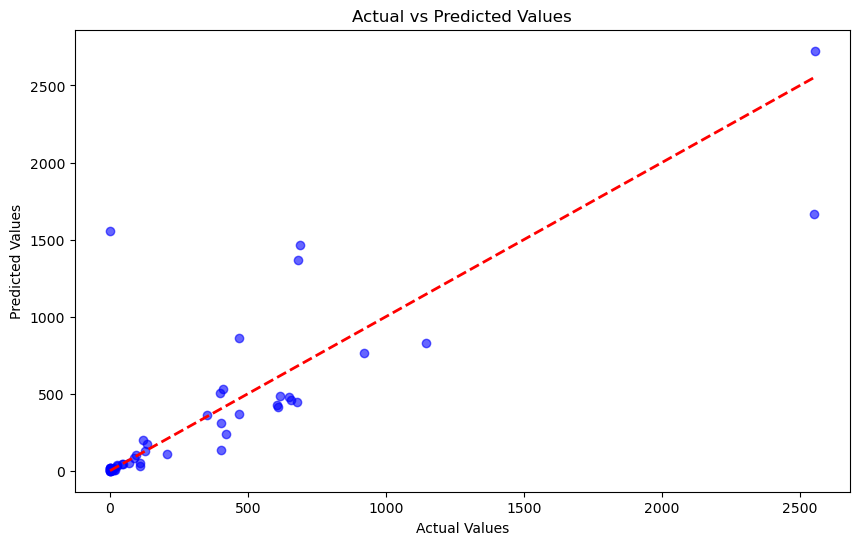

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # 45-degree line
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.savefig("Actual vs predicted.png", format="png", dpi=300, bbox_inches="tight")
plt.show()# ACTUAL VLUES

In [ ]:
# RESIDUAL PLOT

In [27]:
residuals = y_test - pred

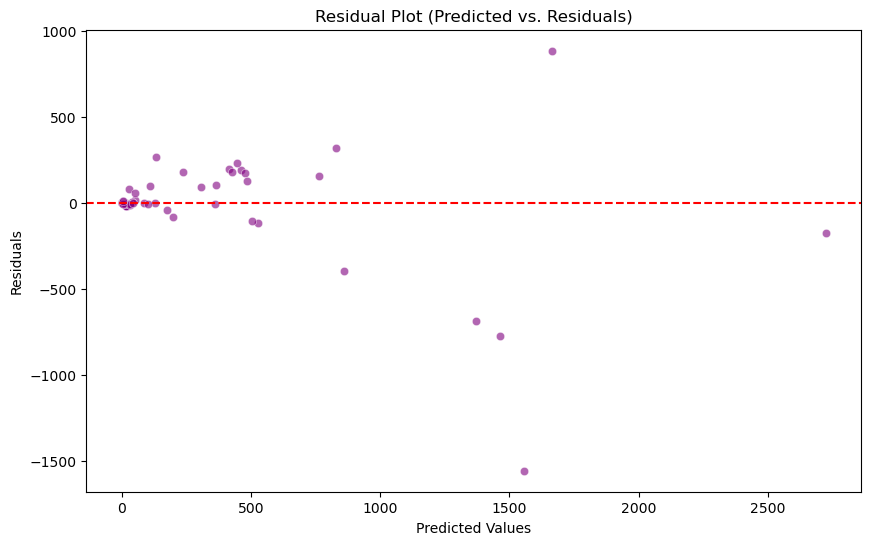

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pred, y=residuals, color='purple', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot (Predicted vs. Residuals)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.savefig("Residual plot.png", format="png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
# ERROR DISTRIBUTIN PLOT(HISTOGRAM OF RESIDUALS)

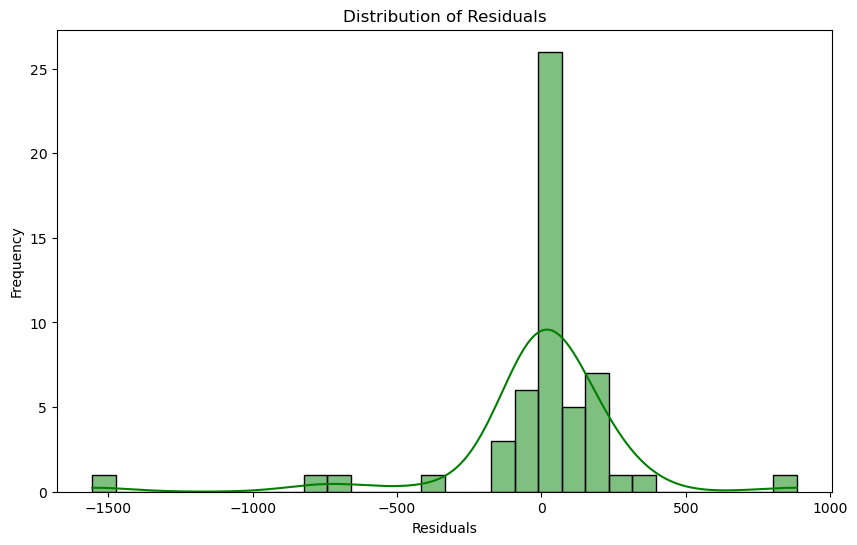

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True, color='green')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.savefig("Error distribution.png", format="png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
# WITH RandomForestClassifier

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(max_depth=5,random_state=42)
model.fit(X,y)
predi = model.predict(X_test)
predi

print("Accuracy:", accuracy_score(y_test, predi))
print("Classification Report:\n", classification_report(y_test, predi))
print("Confusion Matrix:\n", confusion_matrix(y_test, predi))

Accuracy: 0.8888888888888888
Classification Report:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          19       0.00      0.00      0.00         1
          24       1.00      1.00      1.00         1
          25       1.00      1.00      1.00         1
          44       1.00      1.00      1.00         1
          47       1.00     

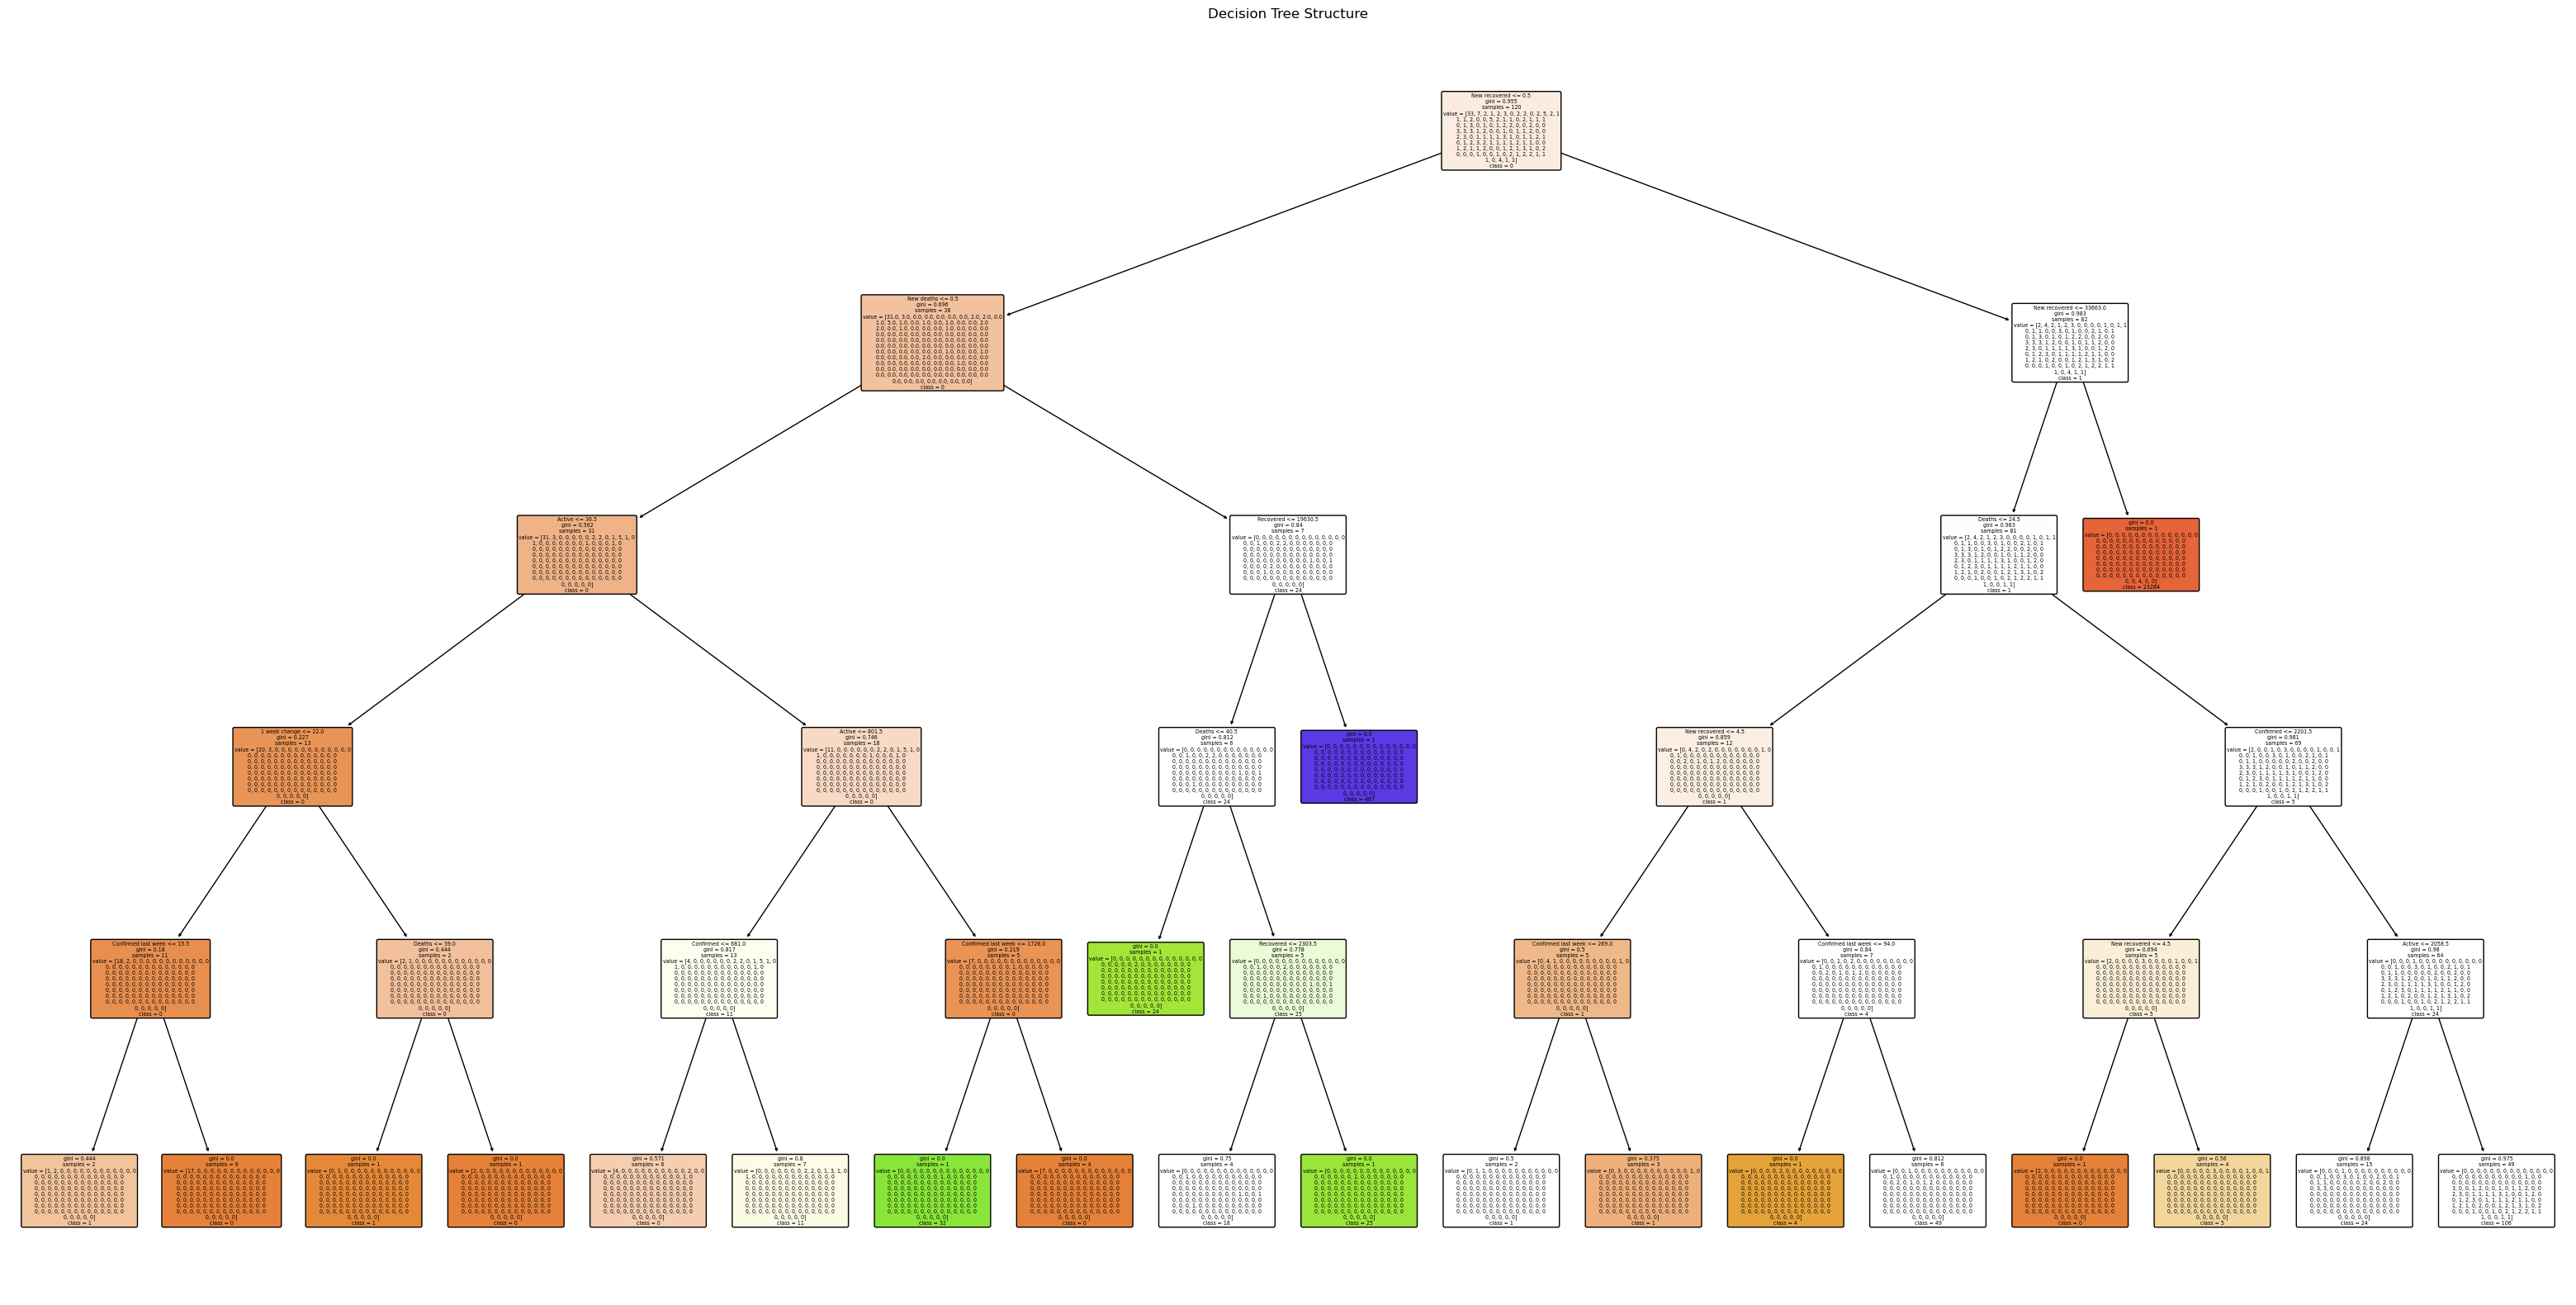

In [31]:
plt.figure(figsize=(40, 20))
plot_tree(model.estimators_[0], 
          feature_names=X.columns, 
          class_names=[str(c) for c in model.classes_], 
          filled=True, rounded=True)
plt.title("Decision Tree Structure")
plt.savefig("Randomclassifier_tree.png", format="png", dpi=300, bbox_inches="tight")
plt.show()


# Confusion matrix

<Figure size 15000x7500 with 0 Axes>

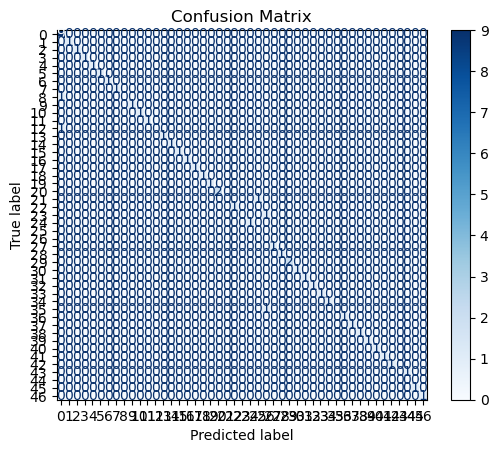

In [32]:

# Generate predictions
predi = model.predict(X_test)

# Plot the confusion matrix
plt.figure(figsize=(150, 75))
cm = confusion_matrix(y_test, predi)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.savefig("Confusion matrix.png", format="png", dpi=300, bbox_inches="tight")
plt.show()


# Prediction Scores

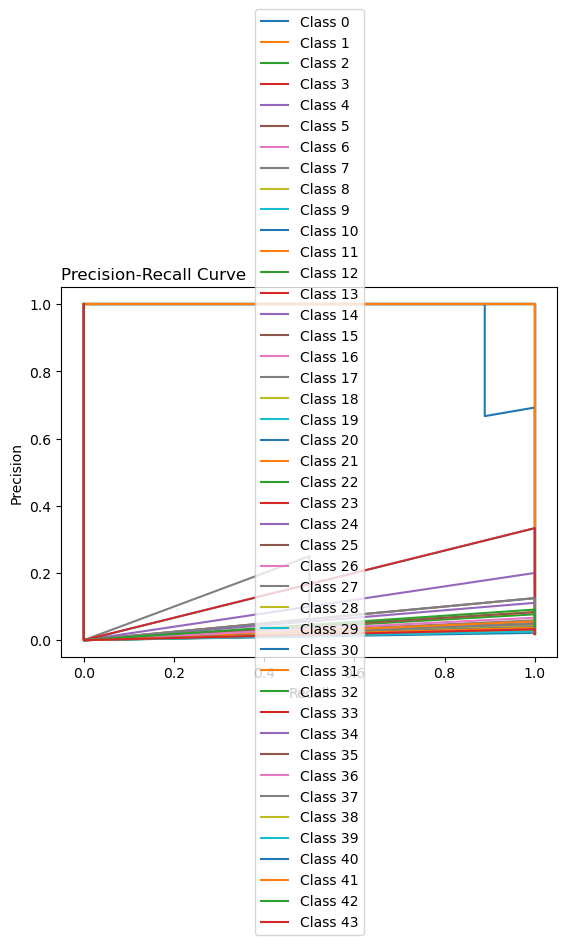

In [33]:
# Binarize y_test
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)

# Get prediction scores for each class
y_score = model.predict_proba(X_test)

# Plot precision-recall curves
if y_test_bin.shape[1] == 1:
    # Binary classification case
    PrecisionRecallDisplay.from_estimator(model, X_test, y_test)
else:
    # Multi-class case
    for i in range(y_test_bin.shape[1]):
        precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
        plt.plot(recall, precision, label=f'Class {i}')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve", loc="left")
plt.legend(loc="center")
plt.savefig("precision-Recall Curve.png", format="png", dpi=300, bbox_inches="tight")
plt.show()